# Brickset Merge Job Files & Clean 

Workflow: 3   
Goal: To concatenate the job files with the raw data, do some cleaning, and export entire dataset into csv.   

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2            # reload custom py file eveytime a new cell is run

import lego_helper as lh

## Merge Job Files

In [4]:
SET_0_FILE = 'data/brickset_set_data_0k.csv'
SET_3_FILE = 'data/brickset_set_data_3k.csv'
SET_7_FILE = 'data/brickset_set_data_7k.csv'
SET_10_FILE = 'data/brickset_set_data_10k.csv'

In [5]:
set_0_df = pd.read_csv(SET_0_FILE)
set_3_df = pd.read_csv(SET_3_FILE)
set_7_df = pd.read_csv(SET_7_FILE)
set_10_df = pd.read_csv(SET_10_FILE)

set_0_df.shape
set_3_df.shape
set_7_df.shape
set_10_df.shape

(3499, 19)

(3499, 19)

(3491, 19)

(3399, 19)

In [6]:
set_df = pd.concat([set_0_df, set_3_df, set_7_df, set_10_df], ignore_index=True)
set_df.head()
set_df.info()

,set_no,name,url,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,minifig_url,store_price,current_price,rating_value,rating_votes,tags,set_type,packaging,notes
0,722-1,"Universal Building Set, 7+",/sets/722-1/Universal-Building-Set-7,Basic,Basic,NaN,1980.0,301.0,0.0,NaN,NaN,$20.00,"New: $200, Used: $78",4.4,5,"4X4, Aircraft, Articulated Lorry, Boat, Car, C...",Normal,NaN,NaN
1,733-1,"Universal Building Set, 7+",/sets/733-1/Universal-Building-Set-7,Basic,Basic,NaN,1980.0,533.0,0.0,NaN,NaN,$39.00,"New: $566, Used: $109",4.5,2,"Articulated Lorry, Base, Baseplate, Crane, For...",Normal,NaN,NaN
2,744-1,"Universal Building Set with Motor, 7+",/sets/744-1/Universal-Building-Set-with-Motor-7,Basic,Basic,NaN,1980.0,537.0,0.0,NaN,NaN,$59.00,"New: $252, Used: $97",5.0,2,"8 Wheel Vehicle, Crane, Electric Motor, Mobile...",Normal,NaN,NaN
3,820-1,Red Plates Parts Pack,/sets/820-1/Red-Plates-Parts-Pack,Basic,Basic,Supplementaries,1980.0,34.0,0.0,NaN,NaN,$4.75,"New: Not known, Used: Not known",NaN,NaN,NaN,Normal,NaN,NaN
4,822-1,Blue Plates Parts Pack,/sets/822-1/Blue-Plates-Parts-Pack,Basic,Basic,Supplementaries,1980.0,34.0,0.0,NaN,NaN,$4.75,"New: $29, Used: $5",NaN,NaN,NaN,Normal,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13888 entries, 0 to 13887
Data columns (total 19 columns):
set_no           13887 non-null object
name             13887 non-null object
url              13887 non-null object
theme_group      13887 non-null object
theme            13887 non-null object
subtheme         10161 non-null object
year             13887 non-null float64
piece_cnt        10948 non-null float64
minifig_cnt      13887 non-null float64
inventory_url    7018 non-null object
minifig_url      6295 non-null object
store_price      9280 non-null object
current_price    13887 non-null object
rating_value     6870 non-null float64
rating_votes     6870 non-null object
tags             10358 non-null object
set_type         13886 non-null object
packaging        9017 non-null object
notes            5288 non-null object
dtypes: float64(4), object(15)
memory usage: 2.0+ MB


In [7]:
# drop the sets that errored out from url search

set_df = set_df.dropna(subset=['set_no']).reset_index().drop(columns=['index'])
set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13887 entries, 0 to 13886
Data columns (total 19 columns):
set_no           13887 non-null object
name             13887 non-null object
url              13887 non-null object
theme_group      13887 non-null object
theme            13887 non-null object
subtheme         10161 non-null object
year             13887 non-null float64
piece_cnt        10948 non-null float64
minifig_cnt      13887 non-null float64
inventory_url    7018 non-null object
minifig_url      6295 non-null object
store_price      9280 non-null object
current_price    13887 non-null object
rating_value     6870 non-null float64
rating_votes     6870 non-null object
tags             10358 non-null object
set_type         13886 non-null object
packaging        9017 non-null object
notes            5288 non-null object
dtypes: float64(4), object(15)
memory usage: 2.0+ MB


In [8]:
# remove duplicates

doop_flag = set_df.duplicated(subset=['set_no'], keep=False)
doop_df = set_df.loc[ doop_flag ].sort_values('set_no')
doop_df.head(4)
doop_df.shape

,set_no,name,url,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,minifig_url,store_price,current_price,rating_value,rating_votes,tags,set_type,packaging,notes
7179,10287-1,Intelligent NXT Brick (Black),/sets/10287-1/Intelligent-NXT-Brick-(Black),Technical,Mindstorms,NXT,2009.0,1.0,0.0,NaN,NaN,"£107.65, $169.99","New: $99, Used: $230",NaN,NaN,NaN,Normal,NaN,NaN
7084,10287-1,Intelligent NXT Brick (Black),/sets/10287-1/Intelligent-NXT-Brick-(Black),Technical,Mindstorms,NXT,2009.0,1.0,0.0,NaN,NaN,"£107.65, $169.99","New: $99, Used: $230",NaN,NaN,NaN,Normal,NaN,NaN
7180,20007-1,Republic Attack Cruiser,/sets/20007-1/Republic-Attack-Cruiser,Licensed,Star Wars,The Clone Wars,2009.0,84.0,0.0,/inventories/20007-1,NaN,NaN,"New: $30, Used: $13",4.5,6,"Brickmaster, Cartoon, Cartoon Network, Galacti...",Normal,Polybag,[US] BrickMaster exclusive.
7085,20007-1,Republic Attack Cruiser,/sets/20007-1/Republic-Attack-Cruiser,Licensed,Star Wars,The Clone Wars,2009.0,84.0,0.0,/inventories/20007-1,NaN,NaN,"New: $30, Used: $13",4.5,6,"Brickmaster, Cartoon, Cartoon Network, Galacti...",Normal,Polybag,[US] BrickMaster exclusive.


(266, 19)

In [9]:
set_df = set_df.drop_duplicates(subset=['set_no']).reset_index().drop(columns=['index'])
set_df.shape

(13754, 19)

## Investigate the Columns

In [10]:
# investigate set-no

offno_df = set_df.loc[set_df['set_no'].str.contains('-1') == False]
offno_ls = offno_df['set_no'].apply(lambda s: s[:-2])
offno_ls[:5]

19    1041
20    1050
23    1076
41    1129
45    1651
Name: set_no, dtype: object

In [11]:
set_df.loc[set_df['set_no'].str.contains('|'.join(offno_ls))].sort_values('set_no').shape

(3145, 19)

In [12]:
# group themes are too broad

set_df['theme_group'].value_counts()

Miscellaneous       4119
Licensed            1605
Modern day          1498
Pre-school          1359
Action/Adventure    1068
Basic                750
Girls                539
Model making         513
Constraction         501
Technical            467
Historical           466
Educational          406
Racing               247
Junior               213
Vintage themes         3
Name: theme_group, dtype: int64

In [13]:
# theme is the best way of categorizing

set_df['theme'].value_counts().head(20)

Gear                       2063
Duplo                      1117
Star Wars                   662
Town                        594
Collectable Minifigures     547
City                        547
Promotional                 418
Bionicle                    389
Creator                     388
Basic                       370
Service Packs               365
Technic                     360
Friends                     303
Space                       294
Castle                      277
Books                       265
Ninjago                     242
Education                   230
Racers                      225
Seasonal                    146
Name: theme, dtype: int64

In [14]:
# subtheme does not appear useful

set_df['subtheme'].value_counts().head(10)

Product Collection          346
Watches/Clocks              233
Magazine Gift               145
Trains                      140
Miscellaneous               140
Promotional                 132
Monthly Mini Model Build    129
Housewares                  121
Technic                     111
Stationery                  105
Name: subtheme, dtype: int64

In [15]:
InteractiveShell.ast_node_interactivity = 'last'

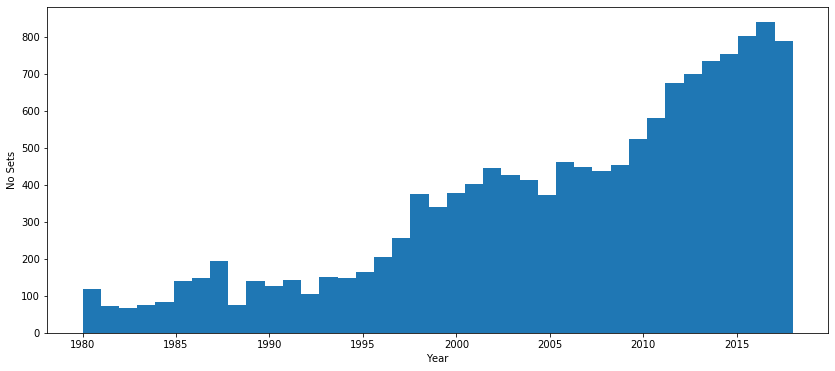

In [16]:
# plot number of set per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='No Sets')
plt.show()

/Users/philbert/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/philbert/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


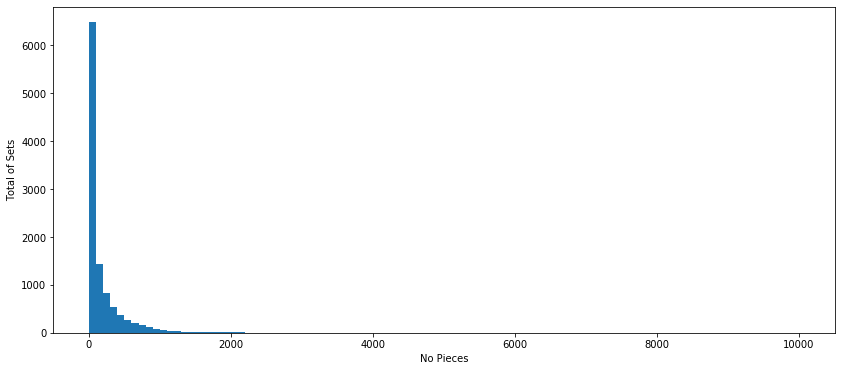

In [17]:
# plot the piece count distribution

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['piece_cnt'].values, bins=100)
axs.set(xlabel='No Pieces', ylabel='Total of Sets')
plt.show()

In [18]:
piece_df = set_df.loc[(set_df['piece_cnt'] >= 1) & (set_df['piece_cnt'] < 1000)]
piece_df.shape

(10503, 19)

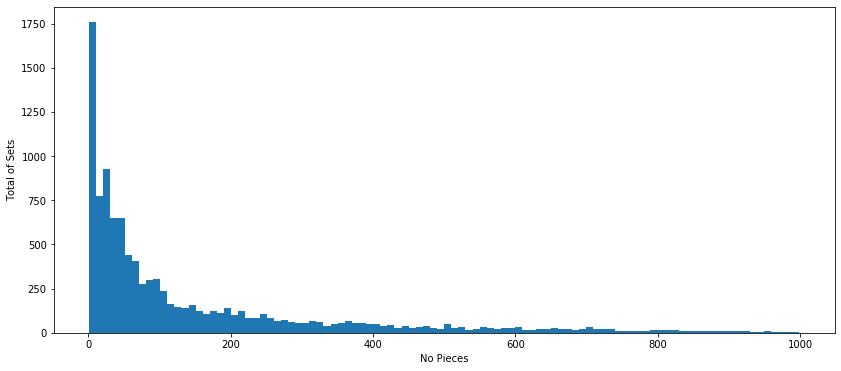

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(piece_df['piece_cnt'].values, bins=100)
axs.set(xlabel='No Pieces', ylabel='Total of Sets')
plt.show()

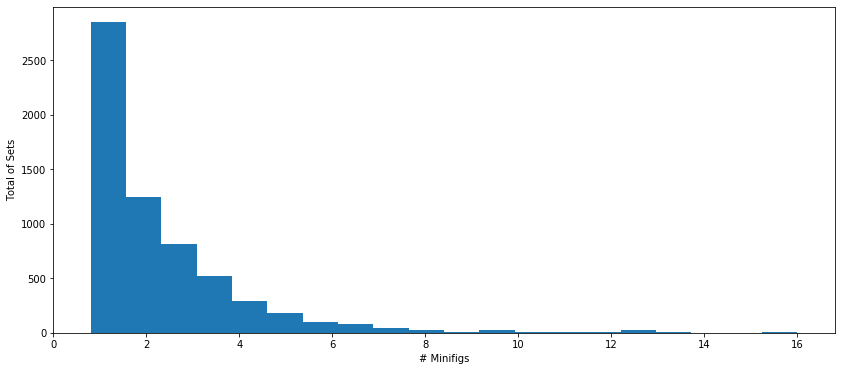

In [20]:
# plot the minifig count distribution

minifig_df = set_df.loc[(set_df['minifig_cnt'] >= 1) & (set_df['minifig_cnt'] <= 20)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(minifig_df['minifig_cnt'].values, bins=20)
axs.set(xlabel='# Minifigs', ylabel='Total of Sets', xlim=(0, 21))
axs.set_xticklabels(range(0, 22, 2))

plt.show()

In [21]:
# clean up the store price

set_df['price_store'] = set_df['store_price'].apply(lh.clean_price)
set_df[['set_no', 'name', 'store_price', 'price_store']][1305:1315]

,set_no,name,store_price,price_store
1305,2780-1,Complete Playhouse,NaN,NaN
1306,4011-1,Cabin Cruiser,$19.75,19.75
1307,4021-1,Police Patrol,$34.00,34.00
1308,4031-1,Firefighter,$52.00,52.00
1309,4515-1,Straight Rails,"£11.99, $12.99",12.99
1310,4520-1,Curved Rails,"£11.99, $12.99",12.99
1311,4531-1,Manual Points with Track,$27.99,27.99
1312,4536-1,Blue Hopper Car,$15.00,15.00
1313,4539-1,Manual Level Crossing,$25.00,25.00
1314,4543-1,Railroad Tractor Flatbed,$22.00,22.00


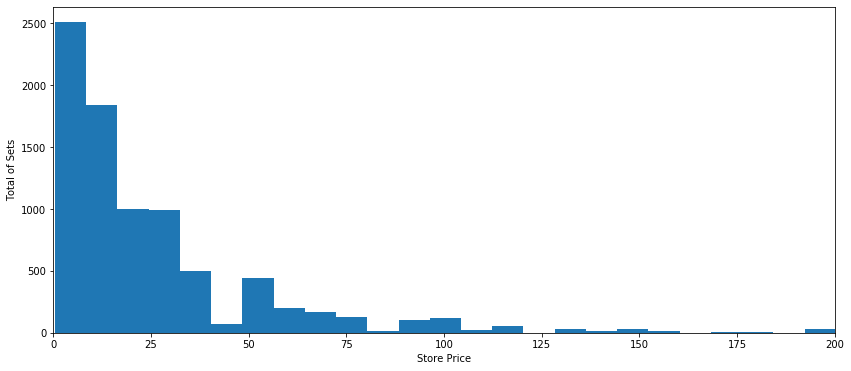

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['price_store'].values, bins=100)
axs.set(xlabel='Store Price', ylabel='Total of Sets', xlim=(0, 200))

plt.show()

In [23]:
# create 2 new columns for current price

set_df['price_used'] = set_df['current_price'].apply(lh.get_price_used)
set_df['price_new'] = set_df['current_price'].apply(lh.get_price_new)
set_df[['set_no', 'name', 'current_price', 'price_used', 'price_new']][2205:2215]

,set_no,name,current_price,price_used,price_new
2205,2161-1,Aqua Dozer,"New: $90, Used: $22",22.0,90.0
2206,2162-1,Hydro Reef Wrecker,"New: $89, Used: $44",44.0,89.0
2207,2163-1,Toucan,"New: $1, Used: $0",0.0,1.0
2208,2164-1,Whale,"New: $2, Used: $1",1.0,2.0
2209,2165-1,Rhinocerous,"New: $2, Used: Not known",NaN,2.0
2210,2166-1,Elephant,"New: $3, Used: Not known",NaN,3.0
2211,2167-1,Penguin,"New: $2, Used: Not known",NaN,2.0
2212,2168-1,Rattle,"New: $5, Used: Not known",NaN,5.0
2213,2181-1,Infomaniac,"New: $270, Used: $45",45.0,270.0
2214,2184-1,XL Bulk Bucket,"New: Not known, Used: Not known",NaN,NaN


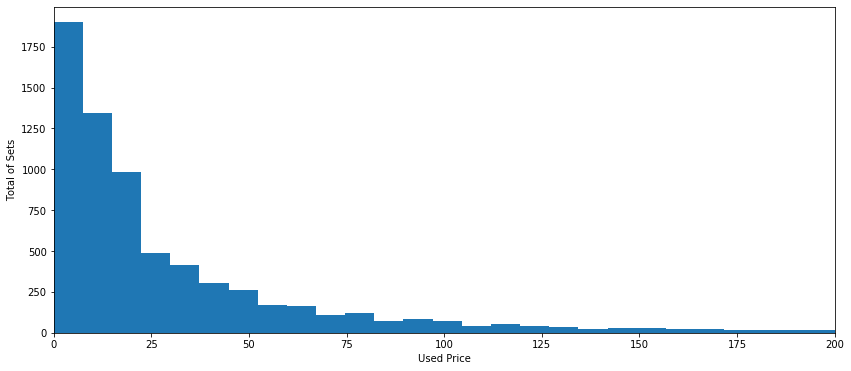

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['price_used'].values, bins=200)
axs.set(xlabel='Used Price', ylabel='Total of Sets', xlim=(0, 200))

plt.show()

In [25]:
# clean the ratings votes column

set_df['rating_votes_cl'] = set_df['rating_votes'].apply(lh.clean_votes).astype('float')
set_df[['set_no', 'name', 'rating_votes', 'rating_votes_cl']][2205:2215]

,set_no,name,rating_votes,rating_votes_cl
2205,2161-1,Aqua Dozer,6,6.0
2206,2162-1,Hydro Reef Wrecker,3,3.0
2207,2163-1,Toucan,NaN,NaN
2208,2164-1,Whale,NaN,NaN
2209,2165-1,Rhinocerous,NaN,NaN
2210,2166-1,Elephant,NaN,NaN
2211,2167-1,Penguin,1review,1.0
2212,2168-1,Rattle,NaN,NaN
2213,2181-1,Infomaniac,2,2.0
2214,2184-1,XL Bulk Bucket,NaN,NaN


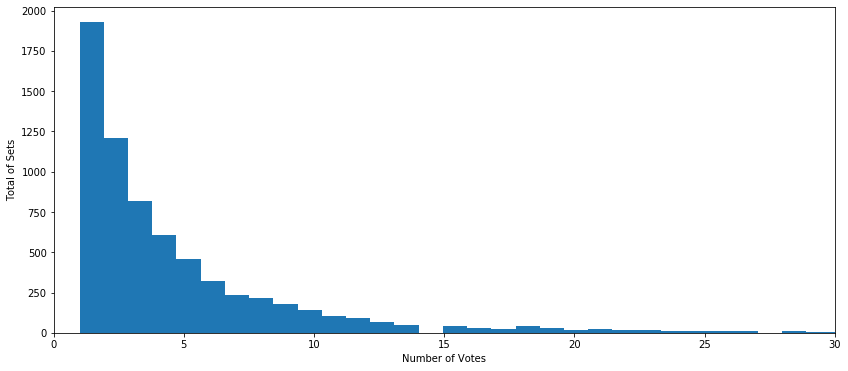

In [26]:
# since there aren't a lot of sets with high votes, the ratings aren't very reliable

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['rating_votes_cl'].values, bins=100)
axs.set(xlabel='Number of Votes', ylabel='Total of Sets', xlim=(0, 30))  # most votes ~100

plt.show()

In [27]:
# investigate the tags 

tag_raw_ls = set_df.loc[set_df['tags'].isna()==False]['tags'].values
tag_raw_ls[:5]

array(['4X4, Aircraft, Articulated Lorry, Boat, Car, Crane, Helicopter, Steam Roller, Trailer, Truck',
       'Articulated Lorry, Base, Baseplate, Crane, Formula 1, Helicopter, Pickup Truck, Racing, Racing Car, Truck',
       '8 Wheel Vehicle, Crane, Electric Motor, Mobile Base, Mobile Crane, Truck, Windmill',
       'Baseplate', 'Baseplate'], dtype=object)

In [28]:
tag_ls = lh.count_in_lists(list(tag_raw_ls))
tag_df = pd.DataFrame(tag_ls).sort_values('count', ascending=False).reset_index()
tag_df = tag_df[['tag', 'count']]
tag_df.head()

,tag,count
0,Polybag,1739
1,Aircraft,715
2,Microscale,675
3,Brick Built Animals,527
4,Car,506


In [29]:
tag_df.shape

(3361, 2)

In [30]:
# set type

set_df['set_type'].value_counts()

Normal        9909
Gear          2063
Other          645
Collection     488
Extended       347
Book           265
Random          36
Name: set_type, dtype: int64

In [31]:
# packaging 

set_df['packaging'].value_counts()

Box                      5306
Polybag                  1732
Foil pack                 853
Blister pack              218
None (loose parts)        173
Bucket                    129
Other                     120
Tag                       114
Canister                   73
Tub                        66
Plastic box                58
Shrink-wrapped             25
Box with backing card      23
Box with handle            14
Zip-lock bag                9
Plastic canister            6
Name: packaging, dtype: int64

In [32]:
# notes - several keywords are avaialble, but they are not more useful than existing columns
# there are only 49 re-released sets, which all have their own fields, so keeping them as is is fine

note_df = set_df.loc[set_df['notes'].isna()==False]
note_df.loc[note_df['notes'].str.contains('Re-released version')][['set_no', 'name', 'url', 'notes']].shape

(49, 4)

In [33]:
set_df.loc[set_df['set_no']=='4999-1']

,set_no,name,url,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,...,rating_value,rating_votes,tags,set_type,packaging,notes,price_store,price_used,price_new,rating_votes_cl
6494,4999-1,Vestas Wind Turbine,/sets/4999-1/Vestas-Wind-Turbine,Model making,Creator Expert,Vestas,2008.0,815.0,3.0,/inventories/4999-1,...,5.0,4,"Baseplate, Dog, Electric, House, Power Functio...",Normal,Box,Limited edition set released in conjunction wi...,NaN,233.0,351.0,4.0


In [34]:
set_df.loc[set_df['set_no']=='10268-1']

,set_no,name,url,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,...,rating_value,rating_votes,tags,set_type,packaging,notes,price_store,price_used,price_new,rating_votes_cl
12970,10268-1,Vestas Wind Turbine,/sets/10268-1/Vestas-Wind-Turbine,Model making,Creator Expert,Vestas,2018.0,826.0,3.0,/inventories/10268-1,...,5.0,1review,"Baseplate, D2c, Dog, Electric, House, Power Fu...",Normal,Box,Re-released version of 4999-1,199.99,169.0,138.0,1.0


In [35]:
set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13754 entries, 0 to 13753
Data columns (total 23 columns):
set_no             13754 non-null object
name               13754 non-null object
url                13754 non-null object
theme_group        13754 non-null object
theme              13754 non-null object
subtheme           10040 non-null object
year               13754 non-null float64
piece_cnt          10858 non-null float64
minifig_cnt        13754 non-null float64
inventory_url      6958 non-null object
minifig_url        6264 non-null object
store_price        9182 non-null object
current_price      13754 non-null object
rating_value       6813 non-null float64
rating_votes       6813 non-null object
tags               10265 non-null object
set_type           13753 non-null object
packaging          8919 non-null object
notes              5231 non-null object
price_store        8378 non-null float64
price_used         7015 non-null float64
price_new          8516 non-null 

In [36]:
set_clean_df = set_df[['set_no', 'name', 'url', 
                 'theme_group', 'theme', 'subtheme',
                 'year', 'piece_cnt', 'minifig_cnt', 'inventory_url', 'minifig_url',
                 'price_store', 'price_new', 'price_used', 'rating_value', 'rating_votes_cl', 
                 'tags', 'set_type', 'packaging']]
set_clean_df = set_clean_df.rename(columns={'rating_votes_cl': 'rating_votes'})
set_clean_df.head()

,set_no,name,url,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,minifig_url,price_store,price_new,price_used,rating_value,rating_votes,tags,set_type,packaging
0,722-1,"Universal Building Set, 7+",/sets/722-1/Universal-Building-Set-7,Basic,Basic,NaN,1980.0,301.0,0.0,NaN,NaN,20.00,200.0,78.0,4.4,5.0,"4X4, Aircraft, Articulated Lorry, Boat, Car, C...",Normal,NaN
1,733-1,"Universal Building Set, 7+",/sets/733-1/Universal-Building-Set-7,Basic,Basic,NaN,1980.0,533.0,0.0,NaN,NaN,39.00,566.0,109.0,4.5,2.0,"Articulated Lorry, Base, Baseplate, Crane, For...",Normal,NaN
2,744-1,"Universal Building Set with Motor, 7+",/sets/744-1/Universal-Building-Set-with-Motor-7,Basic,Basic,NaN,1980.0,537.0,0.0,NaN,NaN,59.00,252.0,97.0,5.0,2.0,"8 Wheel Vehicle, Crane, Electric Motor, Mobile...",Normal,NaN
3,820-1,Red Plates Parts Pack,/sets/820-1/Red-Plates-Parts-Pack,Basic,Basic,Supplementaries,1980.0,34.0,0.0,NaN,NaN,4.75,NaN,NaN,NaN,NaN,NaN,Normal,NaN
4,822-1,Blue Plates Parts Pack,/sets/822-1/Blue-Plates-Parts-Pack,Basic,Basic,Supplementaries,1980.0,34.0,0.0,NaN,NaN,4.75,29.0,5.0,NaN,NaN,NaN,Normal,NaN


In [37]:
set_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13754 entries, 0 to 13753
Data columns (total 19 columns):
set_no           13754 non-null object
name             13754 non-null object
url              13754 non-null object
theme_group      13754 non-null object
theme            13754 non-null object
subtheme         10040 non-null object
year             13754 non-null float64
piece_cnt        10858 non-null float64
minifig_cnt      13754 non-null float64
inventory_url    6958 non-null object
minifig_url      6264 non-null object
price_store      8378 non-null float64
price_new        8516 non-null float64
price_used       7015 non-null float64
rating_value     6813 non-null float64
rating_votes     6813 non-null float64
tags             10265 non-null object
set_type         13753 non-null object
packaging        8919 non-null object
dtypes: float64(8), object(11)
memory usage: 2.0+ MB


## Export to csv

In [38]:
save_path = r'data/brickset_set_clean.csv'
set_clean_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'

'2.7 mb'